### Pandas [Visualization](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)
### Coursera [Applied Plotting, Charting and data Representation in Python](https://www.coursera.org/learn/python-plotting)

Alberto cairo (Tools for thinking about design)

Visualization Wheel Dimensions:

- Abstraction - Figuration
- Functionality - Decoration
- Density - Lightness
- Multidimensional - Unidimensional
- Originality - Familiarity
- Novelty - Redundancy

Edward Tufte (Data-ink Ratio): 

By Increasing the data-ink ratio, one can make the graphic not only simpler and more readable but increased the amount of information of the viewer sees.

Please explore Dark Horse's portfolio and blog for interesting and interactive visuals [here](http://www.darkhorseanalytics.com/)

**Matplotlib Architecture**
- Backend layer
    - Deals with the rendering of plots to screen or files
    - In jupyter botebooks we use the inline backend
- Artist layer
    - Contains containers such as Figure, Subplot, and Axes
    - Contains primitives such as a Line2D and Rectangle and collections such as PathCollection
- Scripting layer
    - Simplifies access to the Artist and Backend layers
    
[Ten simple rules for better figures](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

### Scatter plots, line graphs and bar charts

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline

In [2]:
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

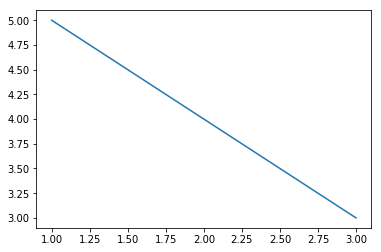

In [3]:
# plt.plot?
plt.plot([3,2, 1], [3,4,5])

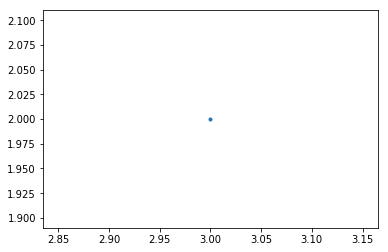

In [4]:
plt.plot(3,2,'.')

In [5]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax  =fig.add_subplot(111)
ax.plot(3,2,'.')
canvas.print_png('test.png')

In [6]:
%%html
<img src='test.png' />

[0, 6, 0, 10]

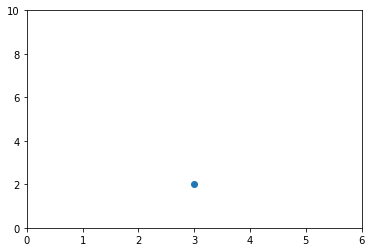

In [7]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3,2,'o')

# get the current axes
ax = plt.gca()

#set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

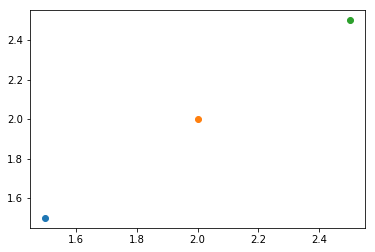

In [8]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

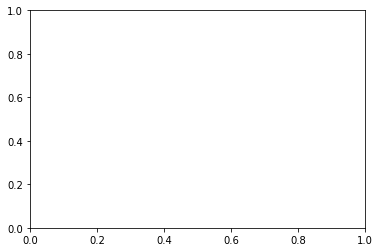

In [9]:
# get current axes
ax = plt.gca()

# get all the child objects that axes contains
ax.get_children()

In [10]:
# get current figure
plt.gcf()

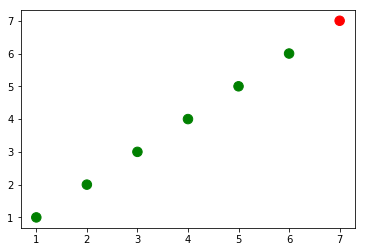

In [11]:
import numpy as np
x = np.array([1,2,3,4,5,6,7])
y = x

colors = ['green'] * (len(x)- 1)
colors.append('red')
plt.figure()
plt.scatter(x,y, c = colors, s =90)

### zip 

In [12]:
zip_list = zip([1,2,3,4,5], [6,7,8,9,10])
zip_list

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [13]:
x, y =zip(*zip_list)  # don't forget the star
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


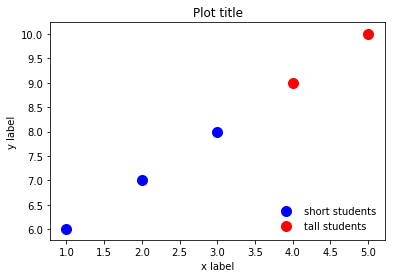

In [14]:
plt.figure()
plt.scatter(x[:3], y[:3], c= 'blue', s =100, label = 'short students')
plt.scatter(x[3:], y[3:], c= 'red', s =100, label = 'tall students')
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Plot title")
plt.legend(loc = 4, frameon=False)

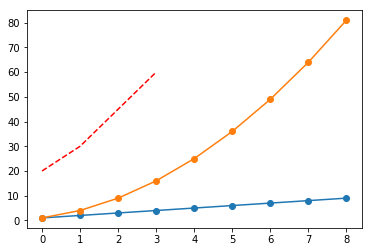

In [15]:
import numpy as np
linear_data = np.array(range(1,10))
exp_data = linear_data ** 2

plt.figure()
plt.plot(linear_data, '-o', exp_data, '-o')
plt.plot([20, 30, 45, 60], '--r')  # dash

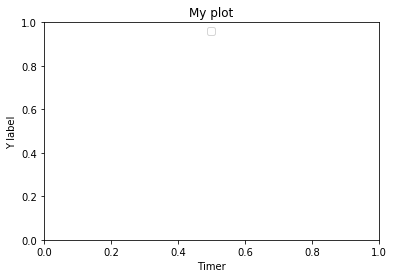

In [16]:
plt.xlabel('Timer')
plt.ylabel('Y label')
plt.title('My plot')
plt.legend(['Baseline', 'exp curve', 'random line'], loc=9)

### fill_between

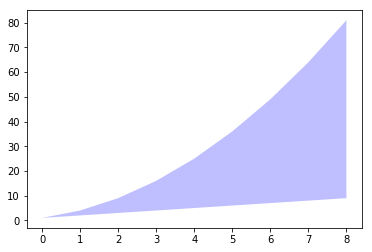

In [17]:
plt.gca().fill_between(range(len(linear_data)), linear_data, exp_data, facecolor = 'blue', alpha = 0.25)

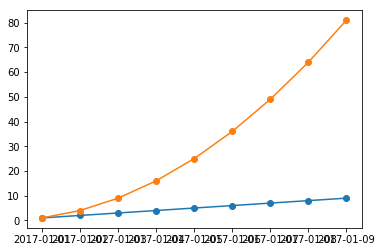

In [18]:
import pandas as pd
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-10', dtype = 'datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o', observation_dates, exp_data, '-o')

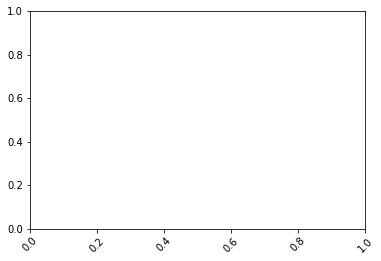

In [19]:
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [20]:
plt.subplots_adjust(bottom=0.25)

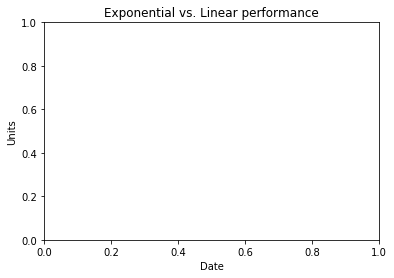

In [21]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [22]:
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")  #Latex

<Container object of 9 artists>

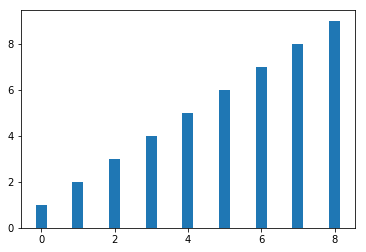

In [23]:
plt.figure()

xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3)

<Container object of 9 artists>

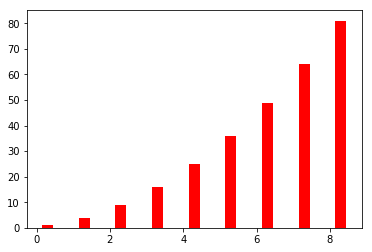

In [24]:
new_xvals = []

for item in xvals:
    new_xvals.append(item+0.3)
    
plt.bar(new_xvals, exp_data, width=0.3, color= 'red')    

<Container object of 9 artists>

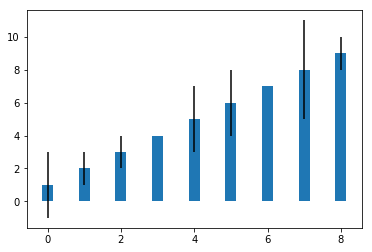

In [25]:
from random import randint
linear_err = [randint(0,3) for x in range(len(linear_data))]

plt.bar(xvals, linear_data, width=0.3, yerr = linear_err)

<Container object of 9 artists>

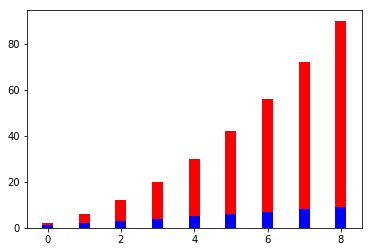

In [26]:
# stack bar chart

plt.figure()
plt.bar(xvals, linear_data, width=0.3, color = 'b')
plt.bar(xvals, exp_data, width=0.3, bottom=linear_data, color= 'r')

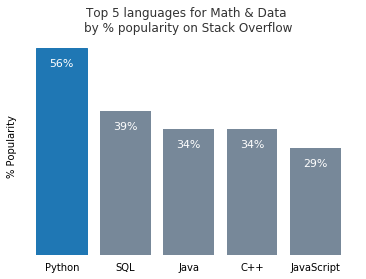

In [27]:
plt.figure()
    
languages = ['Python', 'SQL', 'Java','C++', 'JavaScript']
pos = np.arange(len(languages))
popularity= [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align = 'center', color='lightslategrey')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# make one bar , the python bar, a constrasting color
bars[0].set_color('#1F77B4')

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off',right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# directly label each bar with y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() -5, str(int(height)) + '%', ha='center', color='w', fontsize=11)
plt.show()

### Chart fundamentals - Subplots, interaction and animation

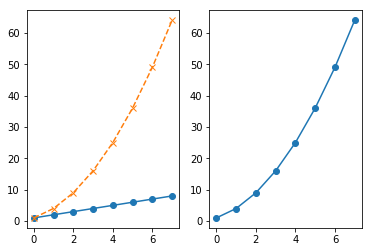

In [28]:
# plt.subplot?
plt.figure()

linear_data=np.array([1,2,3,4,5,6,7,8])
exp_data = linear_data ** 2

ax1 = plt.subplot(1,2,1)  # equals to plt.subplot(121), subplot in single forms
plt.plot(linear_data, '-o')
plt.plot(exp_data, '--x')

ax2 = plt.subplot(1,2,2, sharey = ax1)
plt.plot(exp_data, '-o')

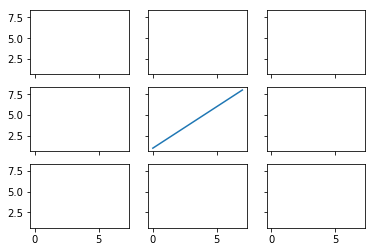

In [29]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey = True)  #subplots in plural form
ax5.plot(linear_data, '-')

In [30]:
for ax in plt.gcf().get_axes():   # gcf not gca()
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [31]:
# redraw the plot()
plt.gcf().canvas.draw()

### histogram

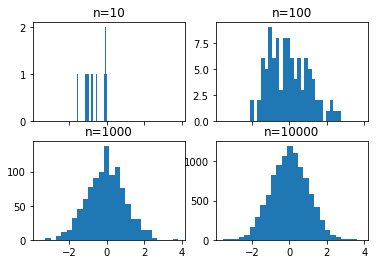

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True)

axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=25)
    axs[n].set_title('n={}'.format(sample_size))

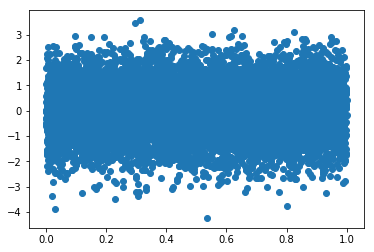

In [33]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

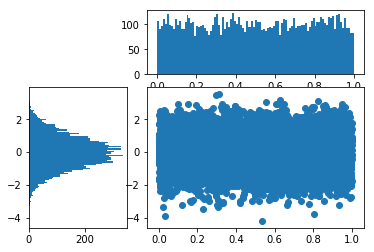

In [34]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(X,Y)
top_histogram.hist(X, bins=100) 
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [35]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)

side_histogram.clear()
side_histogram.hist(Y, bins=100, normed= True, orientation='horizontal')
side_histogram.invert_xaxis()

In [36]:
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0,1)

for ax in [side_histogram, lower_right]:    
    ax.set_ylim(-5,5)

### box plot

In [37]:
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal':normal_sample,
                   'random':random_sample,
                   'gamma': gamma_sample})
df.head()

,gamma,normal,random
0,1.441280,0.223321,0.003258
1,3.667916,-0.597810,0.294769
2,0.905153,-1.184003,0.116114
3,2.604789,-0.588774,0.069659
4,3.528644,-0.390391,0.402432


In [38]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.002991,0.002631,0.499290
std,1.416606,1.000802,0.290026
min,0.011353,-3.730950,0.000073
25%,0.946346,-0.661642,0.243399
50%,1.680868,0.002259,0.503927
75%,2.712918,0.676890,0.751795
max,12.430058,4.146348,0.999846


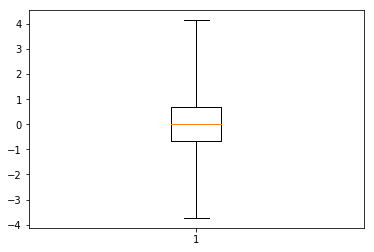

In [39]:
plt.figure()
_ = plt.boxplot(df['normal'], whis='range')

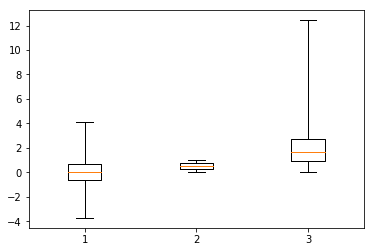

In [40]:
plt.clf()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

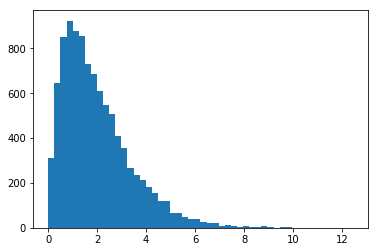

In [41]:
plt.figure()
_ = plt.hist(df['gamma'], bins=50)

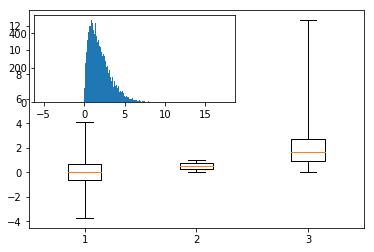

In [42]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()

plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [43]:
# move the y axis to the right
ax2.yaxis.tick_right()

{'boxes': [<matplotlib.lines.Line2D at 0x12c46748>,
 'caps': [<matplotlib.lines.Line2D at 0x12d244a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12d30550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12d24f98>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12c468d0>,
  <matplotlib.lines.Line2D at 0x12d54c50>]}

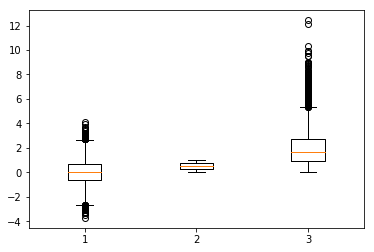

In [44]:
plt.figure()

plt.boxplot([df['normal'], df['random'], df['gamma']])  # detect outlier

### heatmap -- tow dimensional histogram

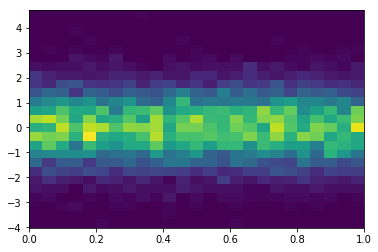

In [45]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_= plt.hist2d(X, Y, bins=25)

### Animation

In [47]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [48]:
def update(curr):
    if curr == n :
        a.event_source.stop()
    
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    
    plt.hist(x[:curr], bins= bins)
    
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])        

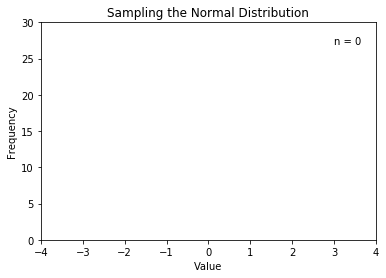

In [49]:
fig = plt.figure()

a = animation.FuncAnimation(fig, update, interval=100)

### interactivity

5

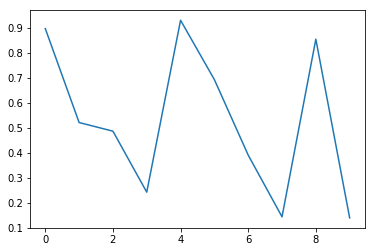

In [50]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    
    plt.cla()
    plt.plot(data)
    
    plt.gca().set_title('Event at pixels {}, {} {} and data {}, {}'.format(event.x, event.y, '\n', event.xdata, event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)    

In [51]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10), 
                  'weight': np.random.rand(10),
                 'origin':origins})

df

,height,origin,weight
0,0.150242,Mexico,0.500093
1,0.935191,India,0.573879
2,0.420634,Brazil,0.815215
3,0.068718,UK,0.211585
4,0.551946,Canada,0.405260
5,0.572664,China,0.219292
6,0.632475,USA,0.179545
7,0.355719,Iraq,0.925888
8,0.860153,Germany,0.382527
9,0.018074,Chile,0.431646


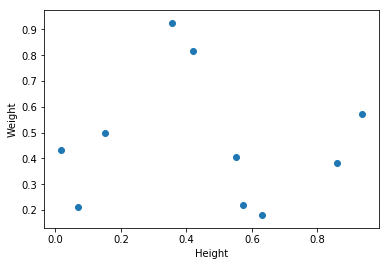

In [52]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)

plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [53]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

plt.gcf().canvas.mpl_connect('pick_event', onpick)

5

### Plotting with pandas

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [56]:
plt.style.use('seaborn-colorblind')

In [57]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),
                   'B': np.random.randn(365).cumsum(0) + 20 ,
                   'C': np.random.randn(365).cumsum(0) - 20},
                 index = pd.date_range('1/1/2017', periods=365) ) #cumulatively summing up random numbers. 
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


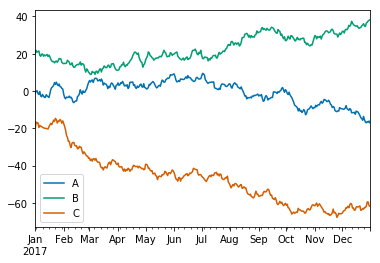

In [58]:
df.plot();

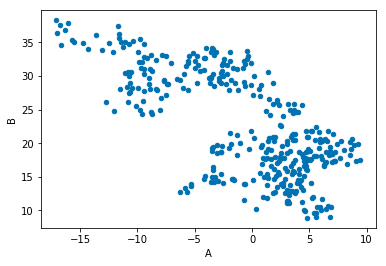

In [59]:
df.plot('A', 'B', kind='scatter');

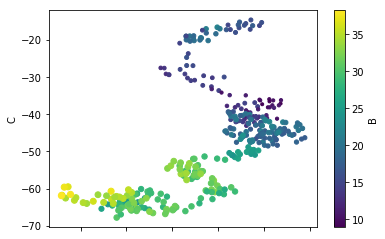

In [60]:
df.plot.scatter('A','C', c='B', s = df['B'], colormap = 'viridis')

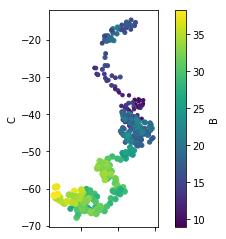

In [61]:
ax = df.plot.scatter('A','C', c='B', s = df['B'], colormap = 'viridis')
ax.set_aspect('equal')

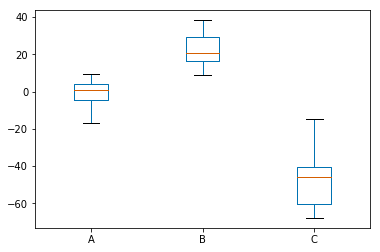

In [62]:
df.plot.box()

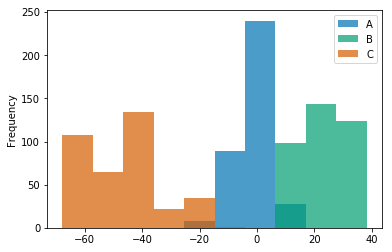

In [63]:
df.plot.hist(alpha=0.7)

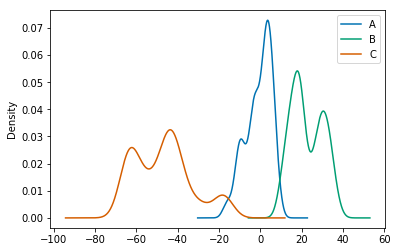

In [64]:
df.plot.kde();

### pandas.tools.plotting

In [65]:
iris = pd.read_csv(r'https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [66]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000148252E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015E91F60>]], dtype=object)

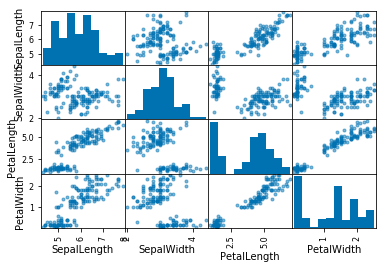

In [67]:
pd.tools.plotting.scatter_matrix(iris)

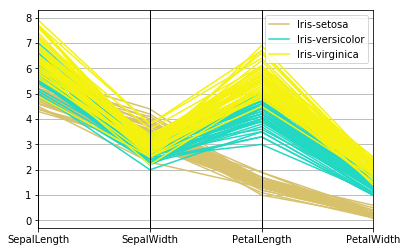

In [68]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name')

In [69]:
import seaborn as sns

In [70]:
np.random.seed(1234)

v1  = pd.Series(np.random.normal(0,10, 1000), name = 'v1')
v2 = pd.Series(2*v1 + np.random.normal(60, 15, 1000), name = 'v2')

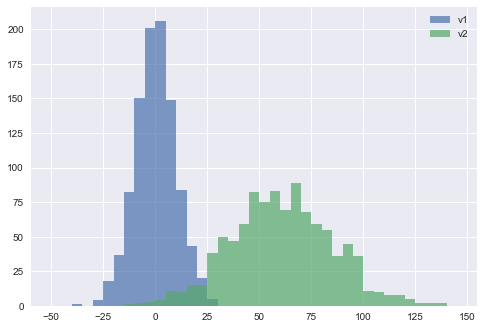

In [71]:
plt.figure()
plt.hist(v1, alpha = 0.7, bins = np.arange(-50, 150, 5), label='v1')
plt.hist(v2, alpha = 0.7, bins = np.arange(-50, 150, 5), label='v2')
plt.legend()

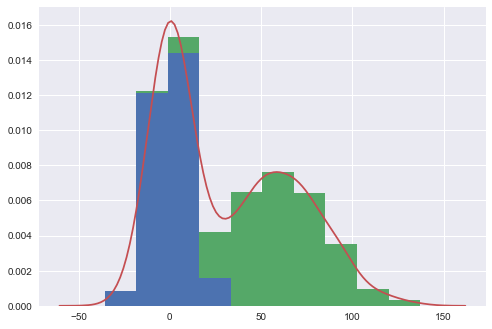

In [72]:
plt.figure()
plt.hist([v1, v2], histtype = 'barstacked', normed=True)
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

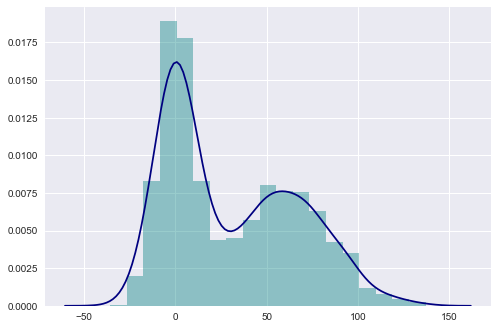

In [73]:
plt.figure()
sns.distplot(v3, hist_kws={'color':'Teal'}, kde_kws={'color':'Navy'});

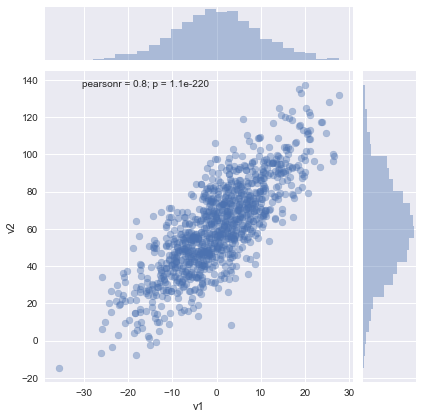

In [74]:
sns.jointplot(v1,v2, alpha=0.4);

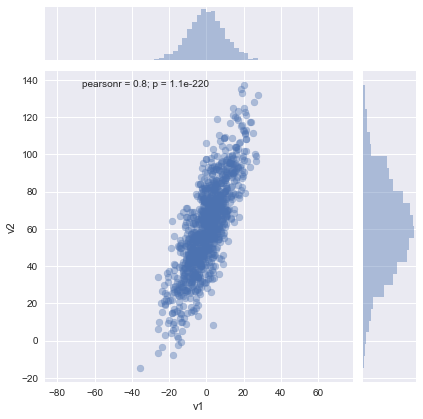

In [75]:
grid = sns.jointplot(v1,v2,alpha = 0.4);
grid.ax_joint.set_aspect('equal')

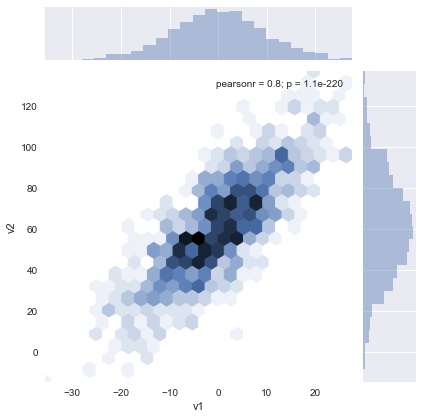

In [76]:
sns.jointplot(v1,v2, kind='hex')

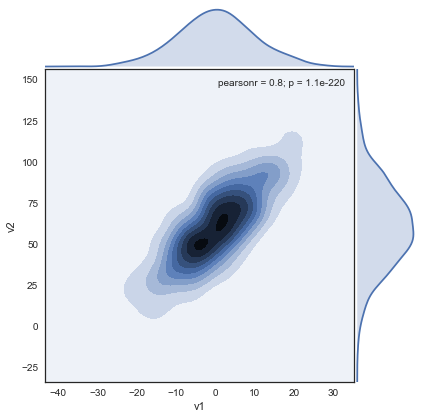

In [77]:
sns.set_style('white')
sns.jointplot(v1,v2, kind='kde', space=0)

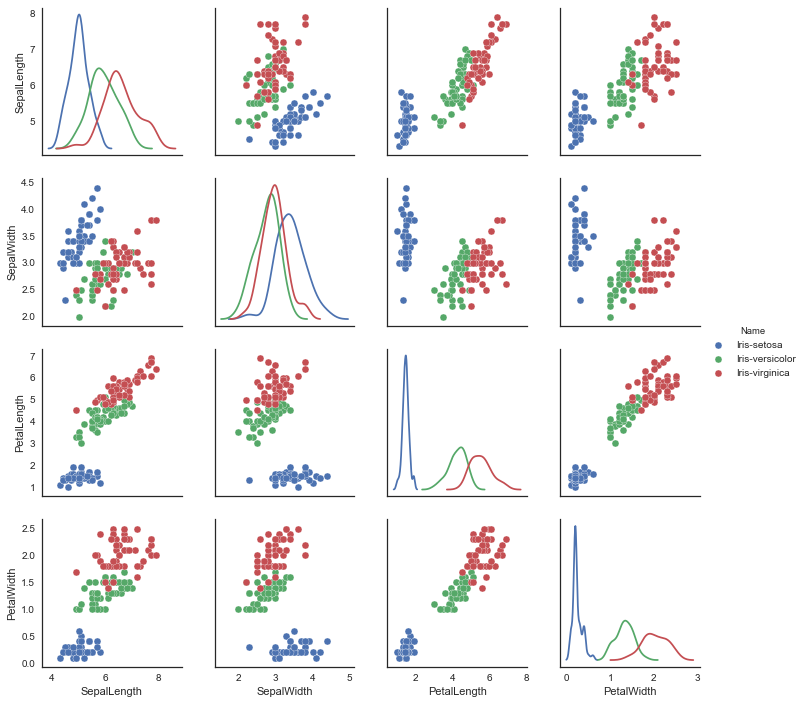

In [78]:
sns.pairplot(iris, hue = 'Name', diag_kind = 'kde')

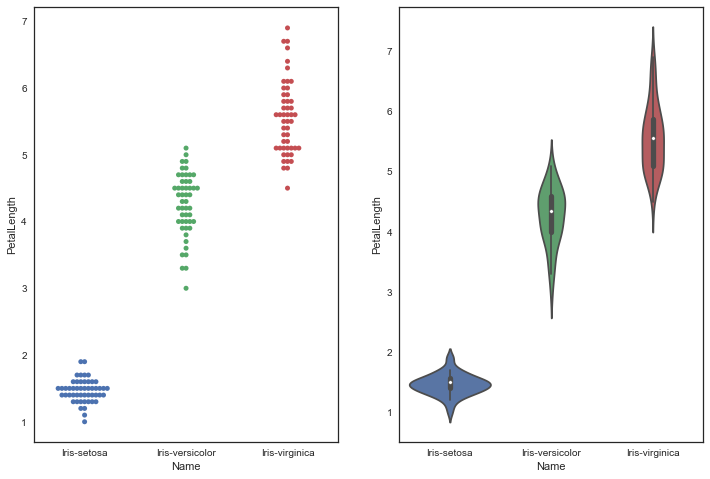

In [79]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);

plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);